In [1]:
# imports
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime, timedelta

In [2]:
vehicles = pd.read_csv('./data/Motor_Vehicle_Collisions_-_Vehicles_20241103.csv', index_col=0, low_memory=False)
# vehicles

In [3]:
# set(vehicles["CONTRIBUTING_FACTOR_1"])
print(vehicles.head)

<bound method NDFrame.head of            COLLISION_ID  CRASH_DATE CRASH_TIME  \
UNIQUE_ID                                        
10385780         100201  09/07/2012       9:03   
19140702        4213082  09/23/2019       8:15   
14887647        3307608  10/02/2015      17:18   
14889754        3308693  10/04/2015      20:34   
14400270         297666  04/25/2013      21:15   
...                 ...         ...        ...   
20774561        4767779  10/27/2024      15:16   
20774656        4767855  10/28/2024       7:45   
20773672        4767169  10/29/2024       4:25   
20774412        4767800  10/24/2024      14:42   
20774394        4767691  10/28/2024       8:37   

                                     VEHICLE_ID STATE_REGISTRATION  \
UNIQUE_ID                                                            
10385780                                      1                 NY   
19140702   0553ab4d-9500-4cba-8d98-f4d7f89d5856                 NY   
14887647                               

In [4]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
print(f'Raw vehicles rows: {vehicles.size:,}' )
print(vehicles.iloc[0])

Raw vehicles rows: 102,665,184
COLLISION_ID                              100201
CRASH_DATE                            09/07/2012
CRASH_TIME                                  9:03
VEHICLE_ID                                     1
STATE_REGISTRATION                            NY
VEHICLE_TYPE                   PASSENGER VEHICLE
VEHICLE_MAKE                                 NaN
VEHICLE_MODEL                                NaN
VEHICLE_YEAR                                 NaN
TRAVEL_DIRECTION                             NaN
VEHICLE_OCCUPANTS                            NaN
DRIVER_SEX                                   NaN
DRIVER_LICENSE_STATUS                        NaN
DRIVER_LICENSE_JURISDICTION                  NaN
PRE_CRASH                                    NaN
POINT_OF_IMPACT                              NaN
VEHICLE_DAMAGE                               NaN
VEHICLE_DAMAGE_1                             NaN
VEHICLE_DAMAGE_2                             NaN
VEHICLE_DAMAGE_3                      

In [5]:
# filter by date 
cutoff_date = datetime.now() - timedelta(days=10*365)
cutoff_year = datetime.today().year + 2
vehicles['CRASH_DATE'] = pd.to_datetime(vehicles['CRASH_DATE'], format='%m/%d/%Y')
filtered_vehicles = vehicles[(vehicles['CRASH_DATE'] >= cutoff_date)
    & (vehicles['VEHICLE_YEAR'] >= 1970)
    & (vehicles['VEHICLE_YEAR'] <= cutoff_year)
    & (vehicles['STATE_REGISTRATION'] != 'ZZ')]
print(f'Filtered vehicles size: {filtered_vehicles.size:,}')
print(f'Raw vehicles size: {vehicles.size:,}')

Filtered vehicles size: 56,342,472
Raw vehicles size: 102,665,184


In [6]:
print(filtered_vehicles["VEHICLE_YEAR"].unique())

[2002. 2015. 2006. 2005. 2013. 2018. 1990. 2007. 2011. 2008. 2019. 2017.
 2003. 2000. 2014. 2010. 2016. 2004. 2012. 2001. 1999. 1993. 1994. 2009.
 2020. 1998. 1989. 1995. 1986. 1997. 1985. 1992. 1996. 1988. 1991. 2021.
 2023. 1971. 2022. 1982. 1979. 1987. 1970. 2024. 1975. 1981. 1983. 1980.
 1984. 1973. 1972. 1978. 1977. 1976. 1974. 2026. 2025.]


In [7]:
print(filtered_vehicles.iloc[0])

COLLISION_ID                                                4213082
CRASH_DATE                                      2019-09-23 00:00:00
CRASH_TIME                                                     8:15
VEHICLE_ID                     0553ab4d-9500-4cba-8d98-f4d7f89d5856
STATE_REGISTRATION                                               NY
VEHICLE_TYPE                    Station Wagon/Sport Utility Vehicle
VEHICLE_MAKE                                          TOYT -CAR/SUV
VEHICLE_MODEL                                                   NaN
VEHICLE_YEAR                                                 2002.0
TRAVEL_DIRECTION                                              North
VEHICLE_OCCUPANTS                                               1.0
DRIVER_SEX                                                        M
DRIVER_LICENSE_STATUS                                      Licensed
DRIVER_LICENSE_JURISDICTION                                      NY
PRE_CRASH                                      G

In [8]:
copy_vehicles = filtered_vehicles.copy()
# copy_vehicles
# copy_vehicles = filtered_vehicles

In [9]:
copy_vehicles.columns

Index(['COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'VEHICLE_ID',
       'STATE_REGISTRATION', 'VEHICLE_TYPE', 'VEHICLE_MAKE', 'VEHICLE_MODEL',
       'VEHICLE_YEAR', 'TRAVEL_DIRECTION', 'VEHICLE_OCCUPANTS', 'DRIVER_SEX',
       'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH',
       'POINT_OF_IMPACT', 'VEHICLE_DAMAGE', 'VEHICLE_DAMAGE_1',
       'VEHICLE_DAMAGE_2', 'VEHICLE_DAMAGE_3', 'PUBLIC_PROPERTY_DAMAGE',
       'PUBLIC_PROPERTY_DAMAGE_TYPE', 'CONTRIBUTING_FACTOR_1',
       'CONTRIBUTING_FACTOR_2'],
      dtype='object')

#### ** TODO: **
Clean up columns
* Separate CRASH_DATE into 3 date fields, year, month day ✔
* Find out if date is a holiday?
* TRAVEL_DIRECTION ✔
* CONTRIBUTING_FACTOR_1, 2
* STATE_REGISTRATION ✔
* VEHICLE_DAMAGE, (20 features), maybe add  _1, _2, _3

In [10]:
copy_vehicles["TRAVEL_DIRECTION"] = copy_vehicles["TRAVEL_DIRECTION"].replace('E', "East").replace('N', "North").replace('S', 'South').replace('W', 'West').replace('U', 'Unknown').replace('-', 'Unknown')
copy_vehicles["TRAVEL_DIRECTION"]= copy_vehicles["TRAVEL_DIRECTION"].fillna('Unknown')

In [11]:
set(copy_vehicles["TRAVEL_DIRECTION"])

{'East',
 'North',
 'Northeast',
 'Northwest',
 'South',
 'Southeast',
 'Southwest',
 'Unknown',
 'West'}

In [12]:
for col in copy_vehicles.columns:
    print(col)
    print(copy_vehicles[col].unique())

COLLISION_ID
[4213082 3434155 4229067 ... 4767444 4767855 4767800]
CRASH_DATE
<DatetimeArray>
['2019-09-23 00:00:00', '2016-05-02 00:00:00', '2019-10-24 00:00:00',
 '2016-08-18 00:00:00', '2016-07-22 00:00:00', '2016-08-13 00:00:00',
 '2019-10-21 00:00:00', '2016-09-08 00:00:00', '2016-04-01 00:00:00',
 '2016-10-17 00:00:00',
 ...
 '2024-10-11 00:00:00', '2024-08-05 00:00:00', '2024-08-12 00:00:00',
 '2024-09-22 00:00:00', '2024-09-24 00:00:00', '2024-10-20 00:00:00',
 '2024-10-26 00:00:00', '2024-10-28 00:00:00', '2024-10-27 00:00:00',
 '2024-10-29 00:00:00']
Length: 3338, dtype: datetime64[ns]
CRASH_TIME
['8:15' '17:35' '13:15' ... '2:56' '3:13' '4:51']
VEHICLE_ID
['0553ab4d-9500-4cba-8d98-f4d7f89d5856' '219456'
 'c53b43d9-419a-4ab1-9361-3f2979078d89' ...
 'a52009fc-b711-4ef4-91f3-59959764fef3'
 '2b3e54aa-012c-4288-8fcb-f8e89e1925be'
 '38efba12-3a2b-453f-84be-196dbc748908']
STATE_REGISTRATION
['NY' 'PA' 'NC' 'NM' nan 'OK' 'NJ' 'VA' 'FL' 'MN' 'ON' 'IL' 'AL' 'MD' 'MA'
 'TX' 'MI' 'TN' '

In [13]:
if 'TRAVEL_DIRECTION' in copy_vehicles.columns:
    encoder = OneHotEncoder(sparse_output=False)
    encoded_data = encoder.fit_transform(copy_vehicles[["TRAVEL_DIRECTION"]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["TRAVEL_DIRECTION"]))
    copy_vehicles = pd.concat([copy_vehicles.drop(columns=["TRAVEL_DIRECTION"]).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)


In [14]:
if 'STATE_REGISTRATION' in copy_vehicles.columns:
    encoder = OneHotEncoder(sparse_output=False)
    encoded_data = encoder.fit_transform(copy_vehicles[["STATE_REGISTRATION"]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["STATE_REGISTRATION"]))
    copy_vehicles = pd.concat([copy_vehicles.drop(columns=["STATE_REGISTRATION"]).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [15]:
if 'CONTRIBUTING_FACTOR_1' in copy_vehicles.columns:
    encoder = OneHotEncoder(sparse_output=False)
    encoded_data = encoder.fit_transform(copy_vehicles[["CONTRIBUTING_FACTOR_1"]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["CONTRIBUTING_FACTOR_1"]))
    copy_vehicles = pd.concat([copy_vehicles.drop(columns=["CONTRIBUTING_FACTOR_1"]).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [16]:
if 'VEHICLE_DAMAGE' in copy_vehicles.columns:
    encoder = OneHotEncoder(sparse_output=False)
    encoded_data = encoder.fit_transform(copy_vehicles[["VEHICLE_DAMAGE"]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["VEHICLE_DAMAGE"]))
    copy_vehicles = pd.concat([copy_vehicles.drop(columns=["VEHICLE_DAMAGE"]).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [17]:
# DROP VEHICLE_ID
# copy_vehicles

In [18]:
# Add dates to separate fields
copy_vehicles["CRASH_DATE"] = pd.to_datetime(copy_vehicles["CRASH_DATE"], format='%m/%d/%Y')
copy_vehicles["CRASH_DATE_YEAR"] = copy_vehicles["CRASH_DATE"].dt.year
copy_vehicles["CRASH_DATE_MONTH"] = copy_vehicles["CRASH_DATE"].dt.month
copy_vehicles["CRASH_DATE_DAY"] = copy_vehicles["CRASH_DATE"].dt.day
# copy_vehicles

In [19]:
# Drop bad columns
if 'STATE_REGISTRATION_nan' in copy_vehicles.columns:
    copy_vehicles = copy_vehicles.drop(columns=["STATE_REGISTRATION_nan"])
if 'CONTRIBUTING_FACTOR_1_nan' in copy_vehicles.columns:
    copy_vehicles = copy_vehicles.drop(columns=["CONTRIBUTING_FACTOR_1_nan"])
if 'VEHICLE_DAMAGE_nan' in copy_vehicles.columns:
    copy_vehicles = copy_vehicles.drop(columns=["VEHICLE_DAMAGE_nan"])

# remove? CONTRIBUTING_FACTOR_1_1, CONTRIBUTING_FACTOR_1_80

In [20]:
set(copy_vehicles.columns)

{'COLLISION_ID',
 'CONTRIBUTING_FACTOR_1_1',
 'CONTRIBUTING_FACTOR_1_80',
 'CONTRIBUTING_FACTOR_1_Accelerator Defective',
 'CONTRIBUTING_FACTOR_1_Aggressive Driving/Road Rage',
 'CONTRIBUTING_FACTOR_1_Alcohol Involvement',
 'CONTRIBUTING_FACTOR_1_Animals Action',
 'CONTRIBUTING_FACTOR_1_Backing Unsafely',
 'CONTRIBUTING_FACTOR_1_Brakes Defective',
 'CONTRIBUTING_FACTOR_1_Cell Phone (hand-Held)',
 'CONTRIBUTING_FACTOR_1_Cell Phone (hands-free)',
 'CONTRIBUTING_FACTOR_1_Driver Inattention/Distraction',
 'CONTRIBUTING_FACTOR_1_Driver Inexperience',
 'CONTRIBUTING_FACTOR_1_Driverless/Runaway Vehicle',
 'CONTRIBUTING_FACTOR_1_Drugs (illegal)',
 'CONTRIBUTING_FACTOR_1_Eating or Drinking',
 'CONTRIBUTING_FACTOR_1_Failure to Keep Right',
 'CONTRIBUTING_FACTOR_1_Failure to Yield Right-of-Way',
 'CONTRIBUTING_FACTOR_1_Fatigued/Drowsy',
 'CONTRIBUTING_FACTOR_1_Fell Asleep',
 'CONTRIBUTING_FACTOR_1_Following Too Closely',
 'CONTRIBUTING_FACTOR_1_Glare',
 'CONTRIBUTING_FACTOR_1_Headlights Defective

In [21]:
set(copy_vehicles["VEHICLE_OCCUPANTS"])

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 59.0,
 60.0,
 61.0,
 62.0,
 65.0,
 69.0,
 71.0,
 74.0,
 75.0,
 76.0,
 80.0,
 81.0,
 87.0,
 91.0,
 94.0,
 99.0,
 100.0,
 101.0,
 110.0,
 111.0,
 135.0,
 148.0,
 156.0,
 169.0,
 170.0,
 183.0,
 211.0,
 221.0,
 235.0,
 263.0,
 314.0,
 318.0,
 326.0,
 327.0,
 328.0,
 337.0,
 339.0,
 344.0,
 349.0,
 378.0,
 382.0,
 383.0,
 392.0,
 413.0,
 426.0,
 618.0,
 631.0,
 639.0,
 650.0,
 678.0,
 693.0,
 737.0,
 743.0,
 769.0,
 994.0,
 999.0,
 1328.0,
 1355.0,
 1356.0,
 1639.0,
 1739.0,
 2013.0,
 2015.0,
 2017.0,
 9999.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 

In [22]:
print(copy_vehicles.iloc[0])

COLLISION_ID                                                                                                4213082
CRASH_DATE                                                                                      2019-09-23 00:00:00
CRASH_TIME                                                                                                     8:15
VEHICLE_ID                                                                     0553ab4d-9500-4cba-8d98-f4d7f89d5856
VEHICLE_TYPE                                                                    Station Wagon/Sport Utility Vehicle
VEHICLE_MAKE                                                                                          TOYT -CAR/SUV
VEHICLE_MODEL                                                                                                   NaN
VEHICLE_YEAR                                                                                                 2002.0
VEHICLE_OCCUPANTS                                                       

TODO
* Drop vehicle year > year +2 --------------------- DONE
* Drop vehicles older than 1970 ------------------- DONE
* Determine vehicle type from description fields -- 
* Drop invalid options (state=ZZ) ----------------- DONE

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [24]:
filtered_vehicles.columns

Index(['COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'VEHICLE_ID',
       'STATE_REGISTRATION', 'VEHICLE_TYPE', 'VEHICLE_MAKE', 'VEHICLE_MODEL',
       'VEHICLE_YEAR', 'TRAVEL_DIRECTION', 'VEHICLE_OCCUPANTS', 'DRIVER_SEX',
       'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH',
       'POINT_OF_IMPACT', 'VEHICLE_DAMAGE', 'VEHICLE_DAMAGE_1',
       'VEHICLE_DAMAGE_2', 'VEHICLE_DAMAGE_3', 'PUBLIC_PROPERTY_DAMAGE',
       'PUBLIC_PROPERTY_DAMAGE_TYPE', 'CONTRIBUTING_FACTOR_1',
       'CONTRIBUTING_FACTOR_2'],
      dtype='object')

In [25]:
def calculate_severity(row):
    if row['NUMBER OF PERSONS KILLED'] > 0:
        return 'Severe'
    elif row['NUMBER OF PERSONS INJURED'] > 0:
        return 'Moderate'
    else:
        return

# filtered_vehicles['crash_severity'] = filtered_vehicles.apply(calculate_severity, axis=1)

<Axes: >

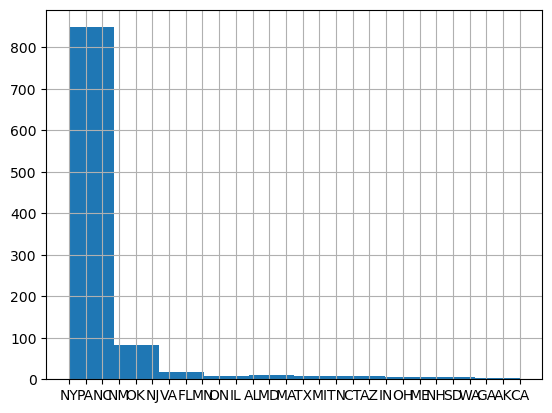

In [30]:
filtered_vehicles[:1000]['STATE_REGISTRATION'].hist()

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import collections

In [48]:
state_abbreviations = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 
    'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NV', 
    'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 
    'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
] #'NE'
initial_string = "STATE_REGISTRATION_"
state_columns = []

for abbr in state_abbreviations:
    state_columns.append(initial_string + abbr)
state_columns

['STATE_REGISTRATION_AL',
 'STATE_REGISTRATION_AK',
 'STATE_REGISTRATION_AZ',
 'STATE_REGISTRATION_AR',
 'STATE_REGISTRATION_CA',
 'STATE_REGISTRATION_CO',
 'STATE_REGISTRATION_CT',
 'STATE_REGISTRATION_DE',
 'STATE_REGISTRATION_FL',
 'STATE_REGISTRATION_GA',
 'STATE_REGISTRATION_HI',
 'STATE_REGISTRATION_ID',
 'STATE_REGISTRATION_IL',
 'STATE_REGISTRATION_IN',
 'STATE_REGISTRATION_IA',
 'STATE_REGISTRATION_KS',
 'STATE_REGISTRATION_KY',
 'STATE_REGISTRATION_LA',
 'STATE_REGISTRATION_ME',
 'STATE_REGISTRATION_MD',
 'STATE_REGISTRATION_MA',
 'STATE_REGISTRATION_MI',
 'STATE_REGISTRATION_MN',
 'STATE_REGISTRATION_MS',
 'STATE_REGISTRATION_MO',
 'STATE_REGISTRATION_MT',
 'STATE_REGISTRATION_NV',
 'STATE_REGISTRATION_NH',
 'STATE_REGISTRATION_NJ',
 'STATE_REGISTRATION_NM',
 'STATE_REGISTRATION_NY',
 'STATE_REGISTRATION_NC',
 'STATE_REGISTRATION_ND',
 'STATE_REGISTRATION_OH',
 'STATE_REGISTRATION_OK',
 'STATE_REGISTRATION_OR',
 'STATE_REGISTRATION_PA',
 'STATE_REGISTRATION_RI',
 'STATE_REGI

In [32]:
filtered_vehicles['STATE_REGISTRATION'][:5]

UNIQUE_ID
19140702    NY
17044639    NY
19138701    NY
17303317    NY
17285715    NY
Name: STATE_REGISTRATION, dtype: object

In [35]:
dummy_set = pd.get_dummies(filtered_vehicles, columns=['STATE_REGISTRATION'])
features = state_columns
X = dummy_set[features]

In [59]:
kmeans_vehicles = KMeans(n_clusters=50)

In [60]:
kmeans_vehicles.fit(X)
dummy_set['cluster'] = kmeans_vehicles.labels_

In [62]:
print('Clusters (result of k-means)')
print(collections.Counter(kmeans_vehicles.labels_))
print(collections.Counter(filtered_vehicles['STATE_REGISTRATION']))

Clusters (result of k-means)
Counter({0: 1930522, 1: 150912, 3: 59255, 2: 30600, 5: 28530, 7: 12536, 9: 11904, 6: 11890, 8: 11302, 10: 10764, 11: 10172, 4: 9893, 12: 9756, 16: 7190, 13: 6043, 15: 5034, 17: 4658, 14: 3675, 19: 3403, 18: 3341, 23: 3072, 21: 2229, 25: 2154, 22: 1971, 24: 1697, 30: 1458, 26: 1440, 28: 1293, 29: 1181, 31: 1152, 20: 1039, 27: 901, 34: 643, 37: 638, 32: 624, 33: 623, 35: 547, 36: 482, 39: 479, 38: 457, 40: 429, 41: 400, 42: 295, 43: 253, 44: 239, 45: 173, 46: 155, 47: 68, 48: 68, 49: 63})
Counter({'NY': 1930522, 'NJ': 150912, 'PA': 59255, 'FL': 30600, 'CT': 28530, 'VA': 12536, 'MD': 11904, 'NC': 11890, 'MA': 11302, 'TX': 10764, 'IN': 10172, 'GA': 9756, 'IL': 7190, nan: 6263, 'AZ': 6043, 'SC': 5034, 'OH': 4658, 'OK': 3675, 'DE': 3403, 'CA': 3341, 'TN': 3072, 'ME': 2229, 'MI': 2154, 'RI': 1971, 'AL': 1697, 'VT': 1458, 'NH': 1440, 'NM': 1293, 'MN': 1181, 'WA': 1152, 'WI': 1039, 'ON': 903, 'MO': 901, 'PQ': 738, 'NB': 705, 'DC': 655, 'KY': 643, 'CO': 638, 'LA': 62

In [56]:
# print('labels_', kmeans_vehicles.labels_[:10])
X[:5]

,STATE_REGISTRATION_AL,STATE_REGISTRATION_AK,STATE_REGISTRATION_AZ,STATE_REGISTRATION_AR,STATE_REGISTRATION_CA,STATE_REGISTRATION_CO,STATE_REGISTRATION_CT,STATE_REGISTRATION_DE,STATE_REGISTRATION_FL,STATE_REGISTRATION_GA,STATE_REGISTRATION_HI,STATE_REGISTRATION_ID,STATE_REGISTRATION_IL,STATE_REGISTRATION_IN,STATE_REGISTRATION_IA,STATE_REGISTRATION_KS,STATE_REGISTRATION_KY,STATE_REGISTRATION_LA,STATE_REGISTRATION_ME,STATE_REGISTRATION_MD,STATE_REGISTRATION_MA,STATE_REGISTRATION_MI,STATE_REGISTRATION_MN,STATE_REGISTRATION_MS,STATE_REGISTRATION_MO,STATE_REGISTRATION_MT,STATE_REGISTRATION_NV,STATE_REGISTRATION_NH,STATE_REGISTRATION_NJ,STATE_REGISTRATION_NM,STATE_REGISTRATION_NY,STATE_REGISTRATION_NC,STATE_REGISTRATION_ND,STATE_REGISTRATION_OH,STATE_REGISTRATION_OK,STATE_REGISTRATION_OR,STATE_REGISTRATION_PA,STATE_REGISTRATION_RI,STATE_REGISTRATION_SC,STATE_REGISTRATION_SD,STATE_REGISTRATION_TN,STATE_REGISTRATION_TX,STATE_REGISTRATION_UT,STATE_REGISTRATION_VT,STATE_REGISTRATION_VA,STATE_REGISTRATION_WA,STATE_REGISTRATION_WV,STATE_REGISTRATION_WI,STATE_REGISTRATION_WY
UNIQUE_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19140702,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17044639,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19138701,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17303317,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17285715,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [55]:
print(filtered_vehicles['STATE_REGISTRATION'].unique())

['NY' 'PA' 'NC' 'NM' nan 'OK' 'NJ' 'VA' 'FL' 'MN' 'ON' 'IL' 'AL' 'MD' 'MA'
 'TX' 'MI' 'TN' 'CT' 'AZ' 'IN' 'OH' 'ME' 'NH' 'SD' 'WA' 'GA' 'AK' 'CA'
 'DC' 'PE' 'AR' 'DE' 'MO' 'RI' 'IA' 'UT' 'KY' 'SC' 'LA' 'NF' 'VT' 'NB'
 'MS' 'NV' 'MT' 'WI' 'CO' 'BC' 'HI' 'WV' 'PQ' 'ID' 'KS' 'WY' 'ND' 'MB'
 'OR' 'NS' 'YT' 'SK' 'AB' 'NT' 'MX' 'T' 'UA' 'LR']


In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=49)
pca.fit(X)
X_transform = pca.transform(X)

In [65]:
X_transform[:5]

array([[-1.91283643e-01, -1.54199103e-02,  4.34792579e-03,
         3.83401835e-04,  1.72746511e-03,  7.51856866e-05,
         2.57950663e-06, -8.51886587e-05, -8.83091522e-05,
        -9.26560637e-05, -6.42961373e-05, -2.23139097e-04,
        -1.66947195e-04, -1.48074400e-04, -6.42784478e-05,
        -1.24167997e-04,  4.35591293e-05, -1.12316770e-05,
        -3.27315052e-05, -7.91982116e-05, -1.35640303e-05,
        -2.59943337e-05, -3.51991849e-05, -3.27910528e-05,
        -3.28791367e-06, -1.85532617e-05, -1.64275562e-05,
        -5.07550220e-06, -1.18438633e-05, -1.36036061e-05,
        -2.35206477e-05,  8.86942610e-07,  2.06182388e-06,
        -1.82810789e-07, -7.01657457e-06, -8.16408767e-06,
        -5.48579028e-07, -2.87038707e-06, -3.38373553e-06,
        -3.18022676e-06, -6.98368646e-06, -5.77727478e-06,
        -2.35507266e-06, -7.34960435e-06,  3.04680912e-06,
         4.51716856e-06,  1.19290811e-16,  4.18862542e-07,
         3.70997419e-07],
       [-1.91283643e-01, -1.54

In [77]:
state_counts = filtered_vehicles['STATE_REGISTRATION'].value_counts()

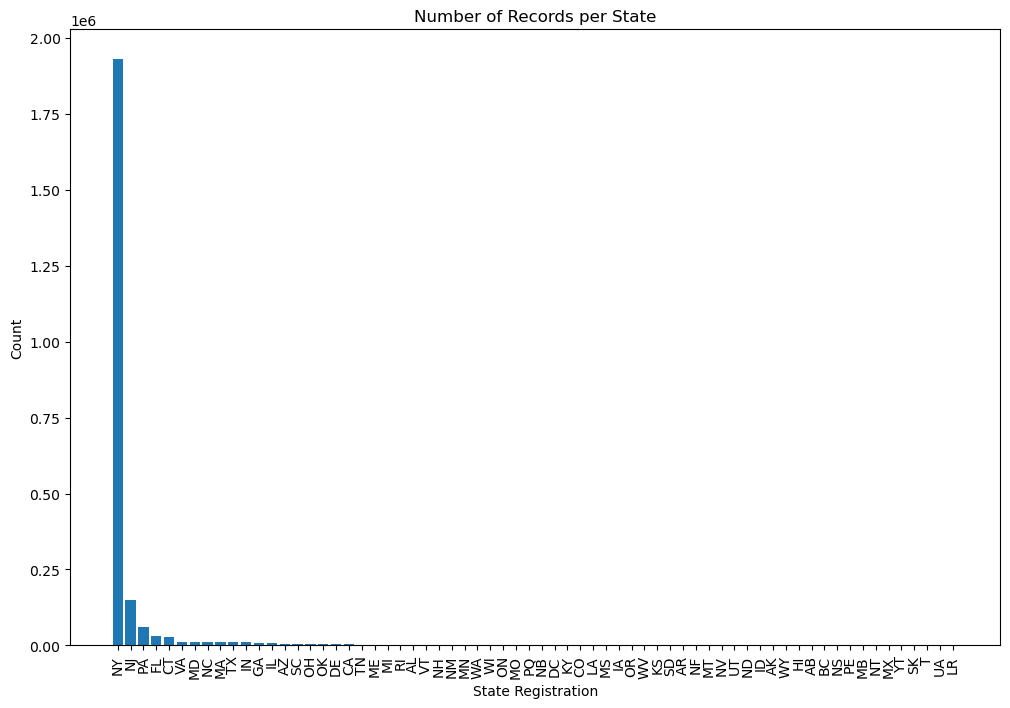

In [80]:
state_counts_df = state_counts.reset_index()
state_counts_df.columns = ['STATE_REGISTRATION', 'COUNT']

plt.figure(figsize=(12, 8))
plt.bar(state_counts_df['STATE_REGISTRATION'], state_counts_df['COUNT'])
plt.xlabel('State Registration')
plt.ylabel('Count')
plt.title('Number of Records per State')
plt.xticks(rotation=90)
plt.show()

In [72]:
# for index, name in enumerate(['a', 'b', 'c']):
#     print(name, index)

In [71]:
# fig = plt.figure(figsize=(12,8))
# ax = fig.add_subplot(projection='3d', elev=48, azim=134)

In [54]:
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x=state_abbreviations, y='', hue='cluster', data=dummy_set, palette='viridis')
# plt.title('Cluster diagram State Registration')
# plt.xlabel('')
# plt.ylabel('')
# plt.show()

In [ ]:
# Write data back to CSV after pre-processing
# filtered_vehicles.to_csv('./processed/vehicles_filtered.csv', index=False)